In [39]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [15]:
data = []
target = []
categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
data_dir = r"Training"
for i in categories:
    path = os.path.join(data_dir,i)
    for img in os.listdir(path):
        image_path = os.path.join(path, img)
        image = cv2.imread(image_path, 0)
        image = cv2.resize(image, (200,200))
        image = np.array(image).flatten()
        data.append(image)
        target.append(i)

In [16]:
x_tarin = np.array(data)
y_train = np.array(target)


In [17]:
x_tarin = pd.DataFrame(x_tarin)
x_tarin

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,1,1,1,0,0,0
2866,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2868,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


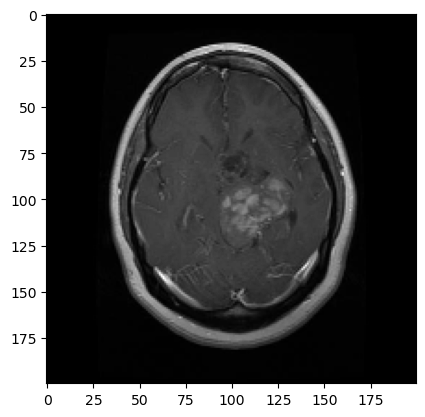

In [18]:
plt.imshow(x_tarin.values[0].reshape(200, 200), cmap="gray")

In [19]:
data = []
target = []
categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
data_dir = r"Testing"
for i in categories:
    path = os.path.join(data_dir,i)
    for img in os.listdir(path):
        image_path = os.path.join(path, img)
        image = cv2.imread(image_path, 0)
        image = cv2.resize(image, (200,200))
        image = np.array(image).flatten()
        data.append(image)
        target.append(i)

In [20]:
x_test = np.array(data)
y_test = np.array(target)

In [21]:
x_test = pd.DataFrame(x_test)
x_test

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,7,7,7,6,6,4,2,2,3,...,5,5,5,4,4,4,4,4,5,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,3,3,3,3,6,0,0,2,2,2,...,0,0,3,3,3,3,0,0,0,0
390,2,2,2,3,3,3,3,3,2,3,...,2,2,2,2,1,2,2,1,1,1
391,2,2,2,3,3,3,3,3,2,3,...,2,2,2,2,1,2,2,1,1,1
392,17,17,17,17,21,21,21,21,20,19,...,22,22,22,22,22,18,3,3,3,3


In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_tarin)
X_test_scaled = scaler.transform(x_test)

In [23]:
pca = PCA(n_components=.95)
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

In [24]:
pca_train.shape

(2870, 903)

In [25]:
model1 = LogisticRegression(max_iter=500)
model1.fit(pca_train, y_train)
print(model1.score(pca_train, y_train))
print(model1.score(pca_test, y_test))

1.0
0.748730964467005


In [26]:
model2 = RandomForestClassifier()
model2.fit(pca_train, y_train)
print(model2.score(pca_train, y_train))
print(model2.score(pca_test, y_test))

1.0
0.7639593908629442


In [27]:
model3 = AdaBoostClassifier()
model3.fit(pca_train, y_train)
print(model3.score(pca_train, y_train))
print(model3.score(pca_test, y_test))

0.659233449477352
0.3350253807106599


In [28]:
model4 = GradientBoostingClassifier()
model4.fit(pca_train, y_train)
print(model4.score(pca_train, y_train))
print(model4.score(pca_test, y_test))

0.9853658536585366
0.7461928934010152


In [29]:
model5 = SVC()
model5.fit(pca_train, y_train)
print(model5.score(pca_train, y_train))
print(model5.score(pca_test, y_test))

0.9655052264808363
0.7208121827411168


In [31]:
y_pred = model1.predict(pca_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  25,  43,   5],
       [  0, 112,   3,   0],
       [  0,   0, 105,   0],
       [  0,  14,   9,  51]], dtype=int64)

Text(50.58159722222221, 0.5, 'true')

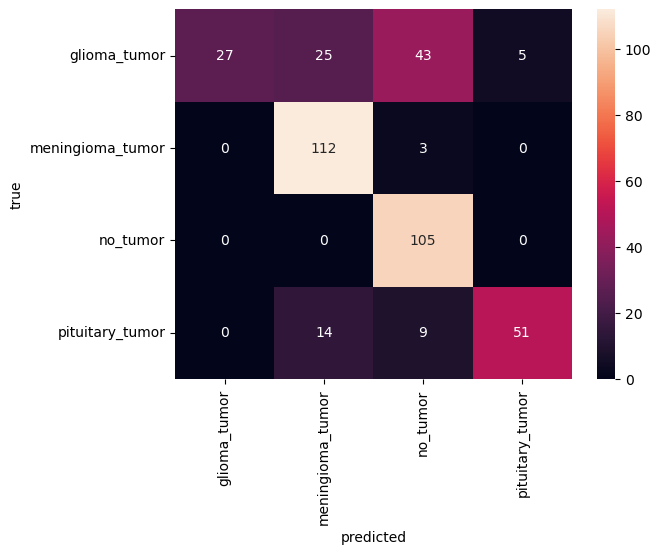

In [35]:
sns.heatmap(cm, annot=True, fmt="g", xticklabels=categories, yticklabels=categories)
plt.xlabel("predicted")
plt.ylabel("true")

In [36]:
f1_score(y_test, y_pred, average="macro")

0.7110925820889149

In [37]:
precision_score(y_test, y_pred, average="macro")

0.8271715350047304

In [38]:
recall_score(y_test, y_pred, average="macro")

0.7332755581668625

In [40]:
model5.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [42]:
grid_space = [
    {"C": [1, 10, 20], "kernel": ["rbf"], "gamma": [1, 0.1]}
]
clf = GridSearchCV(estimator= SVC(), param_grid=grid_space)
clf.fit(pca_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 20], 'gamma': [1, 0.1],
                          'kernel': ['rbf']}])

In [43]:
clf.score(pca_test, y_test)

0.8553299492385786

In [44]:
clf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [45]:
model2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
grid_dist = [
    {"max_depth": np.arange(1, 10), "n_estimators": [50,100,150,200,250,400,500]}
]
clf2 = RandomizedSearchCV(estimator= RandomForestClassifier(), param_distributions=grid_dist, n_iter=3)
clf2.fit(pca_train, y_train)
clf2.score(pca_test, y_test)

0.383248730964467